In [30]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from transformers import DeiTForImageClassificationWithTeacher

In [31]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [32]:
# Set device
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

# Paths and parameters
data_dir = './../../dataset/raw_data/train'  # Your dataset path (5 subfolder classes)
run_folder = 'results/run1'        # Results folder (run1, run2,... etc.)
batch_size = 16
num_epochs = 25
image_size = 224  # Input size for Swin Transformer

# Ensure run_folder exists
if not os.path.exists(run_folder):
    os.makedirs(run_folder)

In [33]:
# Transformations: Random crop for training, Resize for validation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(image_size),
    #transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [34]:
# Load the dataset
dataset = datasets.ImageFolder(root=data_dir)

# Ensure the dataset classes are in the correct order (1, 2, 3, 4, 5)
dataset.classes.sort(key=lambda x: int(x))  # Sort the class names numerically if they are numeric strings

# Create a mapping from numerical labels to class names
label_to_class_name = {idx: class_name for idx, class_name in enumerate(dataset.classes)}

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Assign transformations
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [35]:

# Define the DeiT model with knowledge distillation
model = DeiTForImageClassificationWithTeacher.from_pretrained(
    'facebook/deit-base-distilled-patch16-224', num_labels=5,ignore_mismatched_sizes=True)
model.to(device)

model.to(device)

class_counts = [277,324,581,703,291]

total_samples = sum(class_counts)
class_weights = [total_samples / (len(class_counts) * count) for count in class_counts]
class_weights = torch.FloatTensor(class_weights).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-6, weight_decay=1e-4)


Some weights of DeiTForImageClassificationWithTeacher were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized because the shapes did not match:
- cls_classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- cls_classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- distillation_classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- distillation_classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
# Track training history
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

Epoch 1/25, Train Loss: 1.5809, Train Acc: 28.16%, Val Loss: 1.5165, Val Acc: 33.26%


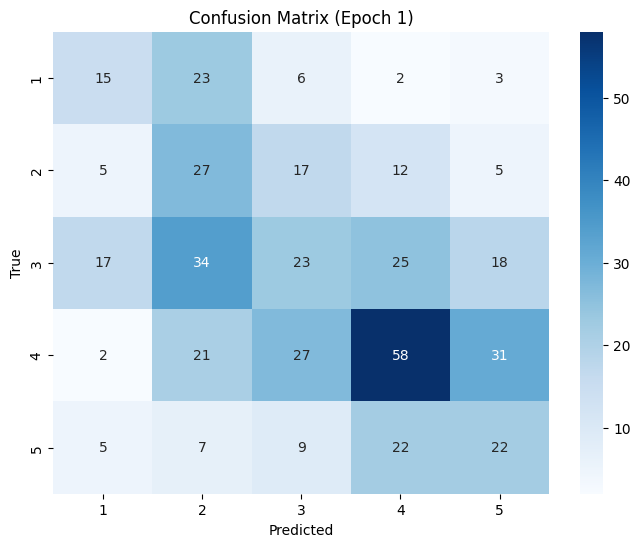

Epoch 2/25, Train Loss: 1.4676, Train Acc: 37.53%, Val Loss: 1.4341, Val Acc: 39.91%


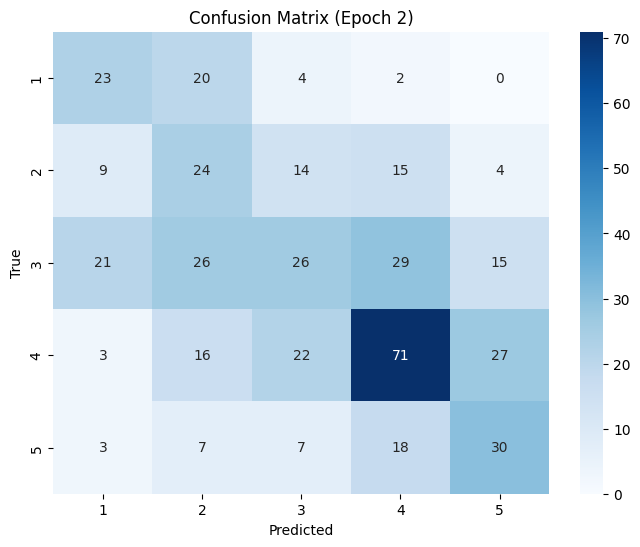

Epoch 3/25, Train Loss: 1.3589, Train Acc: 47.24%, Val Loss: 1.3523, Val Acc: 45.41%


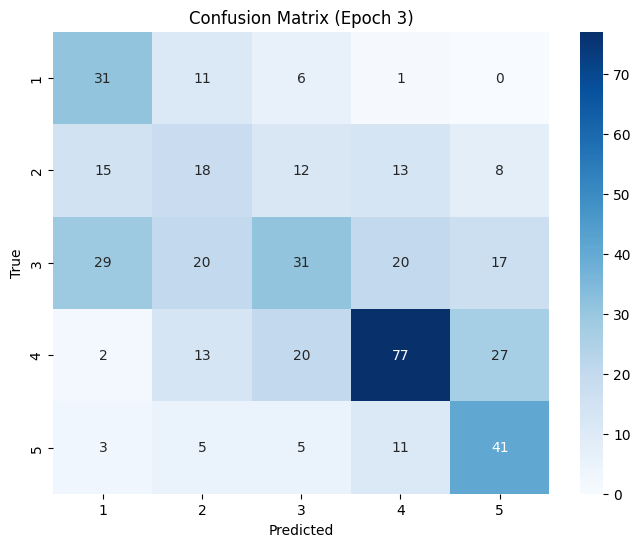

Epoch 4/25, Train Loss: 1.2520, Train Acc: 52.87%, Val Loss: 1.2762, Val Acc: 50.46%


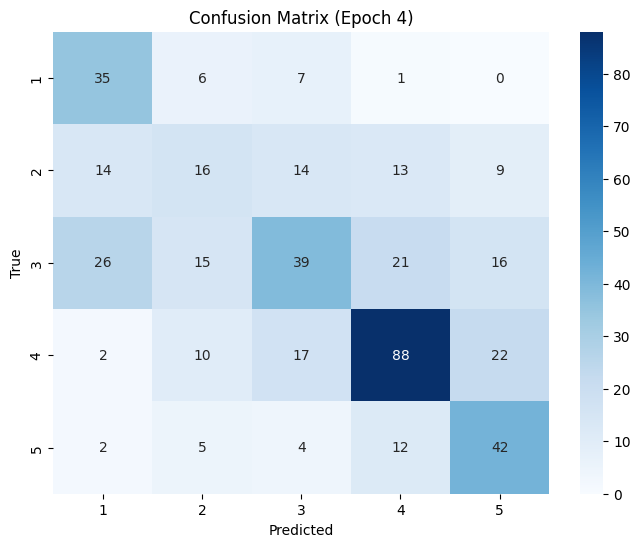

Epoch 5/25, Train Loss: 1.1622, Train Acc: 59.43%, Val Loss: 1.2135, Val Acc: 52.98%


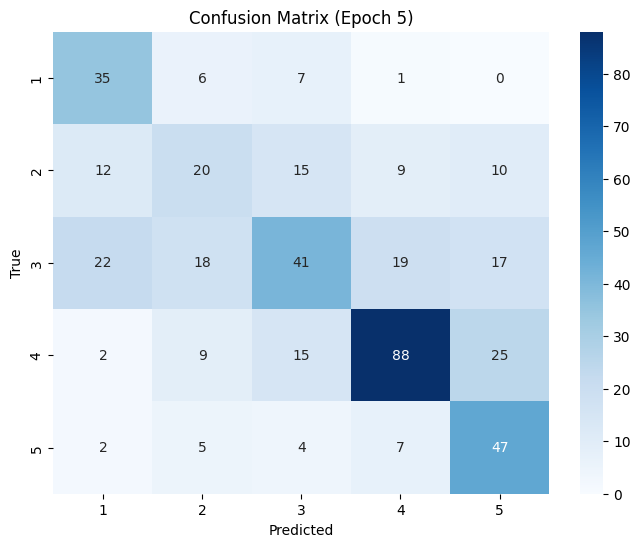

Epoch 6/25, Train Loss: 1.0810, Train Acc: 62.59%, Val Loss: 1.1658, Val Acc: 55.28%


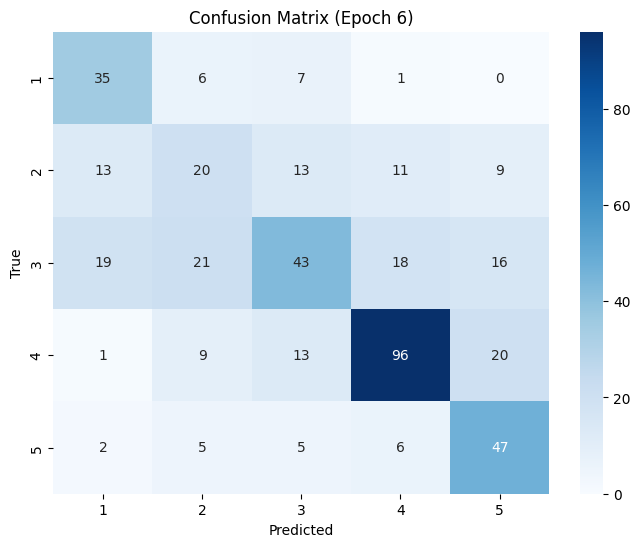

Epoch 7/25, Train Loss: 1.0145, Train Acc: 65.34%, Val Loss: 1.1298, Val Acc: 57.11%


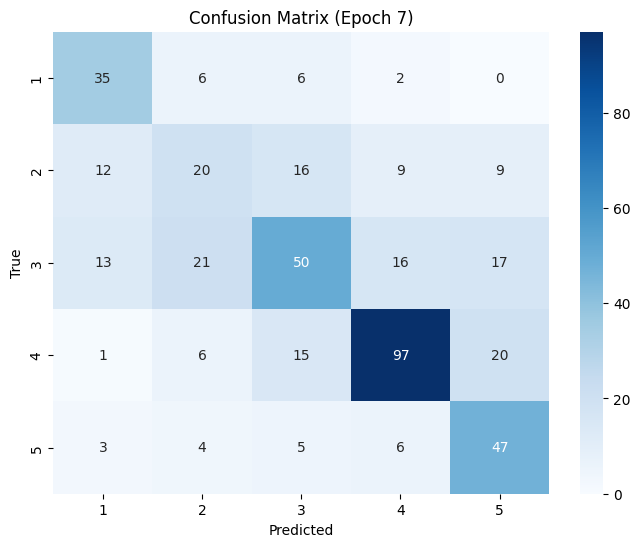

Epoch 8/25, Train Loss: 0.9551, Train Acc: 68.10%, Val Loss: 1.1022, Val Acc: 59.17%


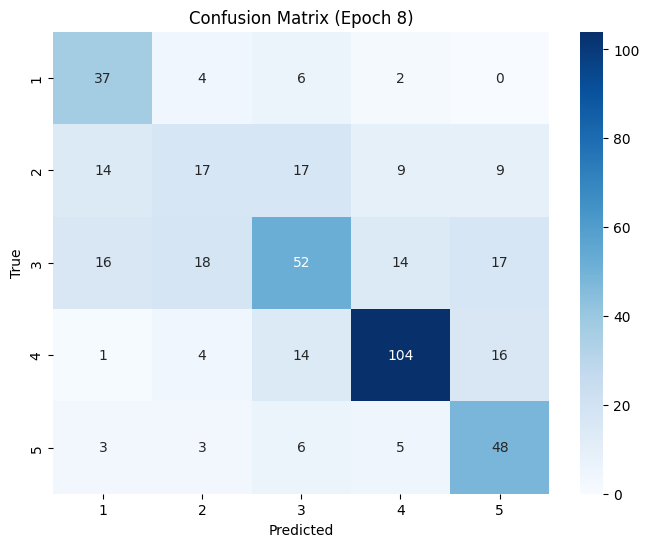

Epoch 9/25, Train Loss: 0.9009, Train Acc: 69.94%, Val Loss: 1.0808, Val Acc: 60.55%


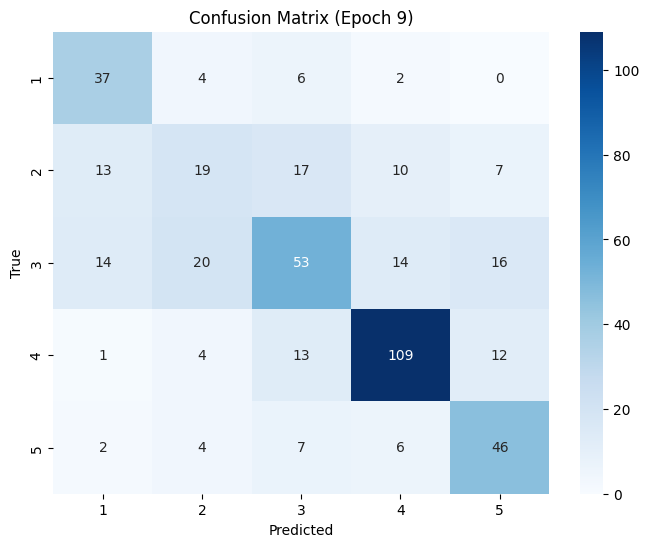

Epoch 10/25, Train Loss: 0.8539, Train Acc: 72.41%, Val Loss: 1.0609, Val Acc: 60.32%


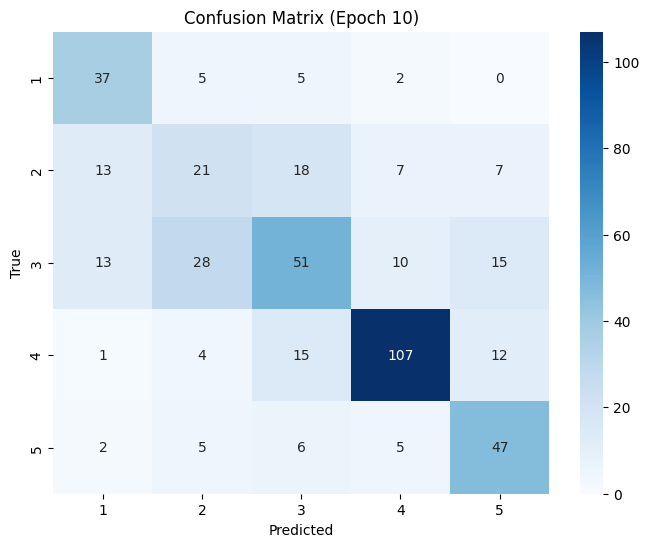

Epoch 11/25, Train Loss: 0.8088, Train Acc: 74.08%, Val Loss: 1.0495, Val Acc: 61.70%


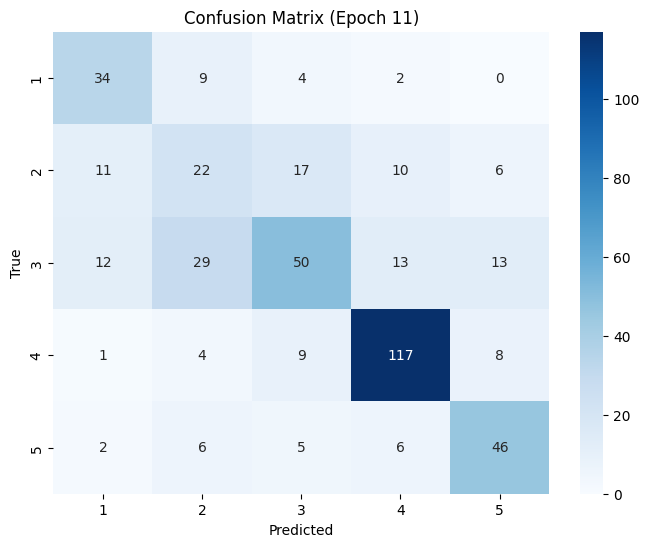

Epoch 12/25, Train Loss: 0.7651, Train Acc: 76.72%, Val Loss: 1.0321, Val Acc: 60.32%


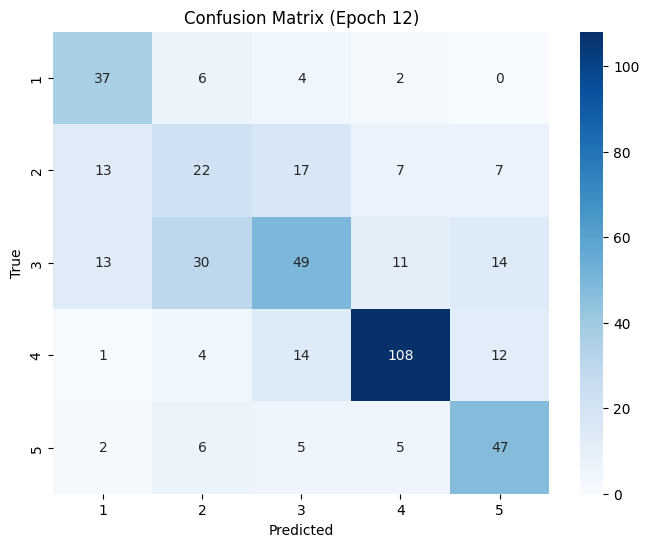

Epoch 13/25, Train Loss: 0.7245, Train Acc: 78.28%, Val Loss: 1.0238, Val Acc: 62.39%


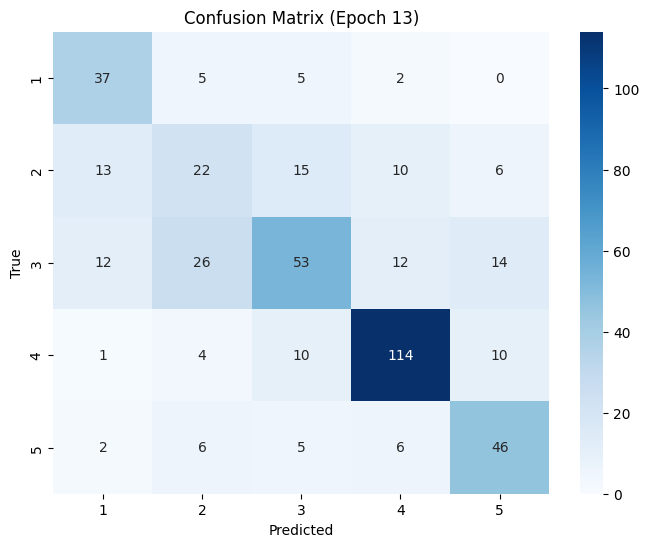

Epoch 14/25, Train Loss: 0.6855, Train Acc: 80.46%, Val Loss: 1.0129, Val Acc: 61.70%


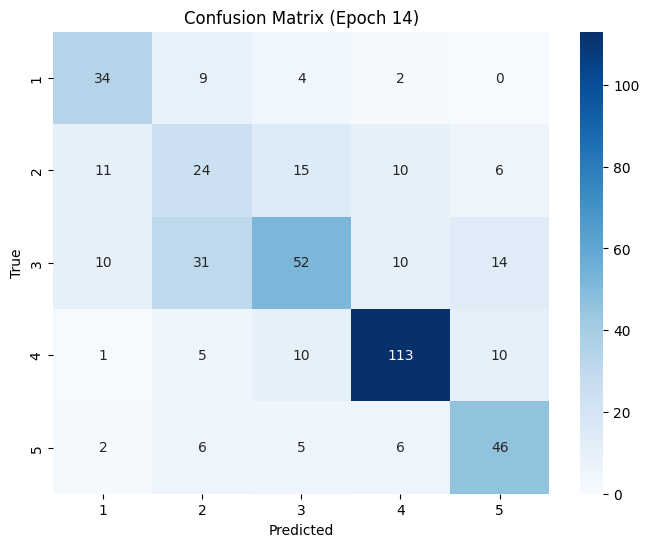

Epoch 15/25, Train Loss: 0.6451, Train Acc: 82.07%, Val Loss: 1.0079, Val Acc: 62.61%


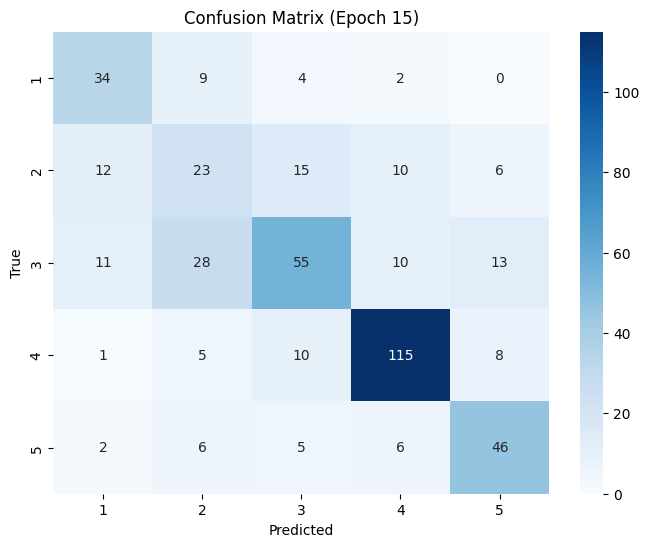

Epoch 16/25, Train Loss: 0.6105, Train Acc: 83.39%, Val Loss: 1.0038, Val Acc: 63.07%


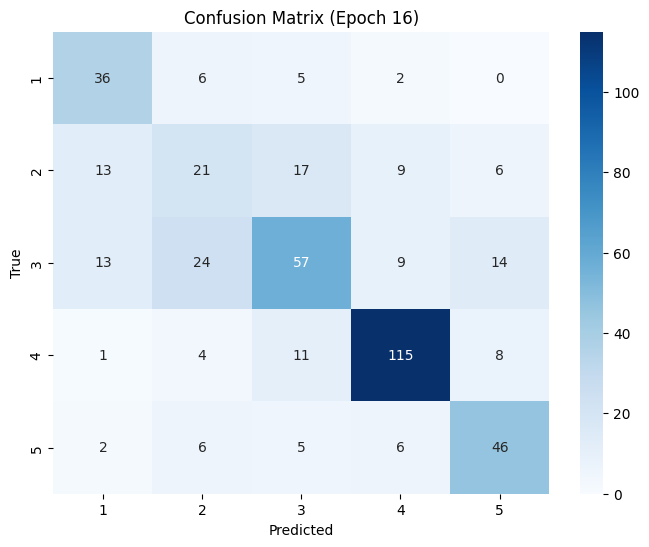

Epoch 17/25, Train Loss: 0.5734, Train Acc: 85.40%, Val Loss: 0.9962, Val Acc: 63.07%


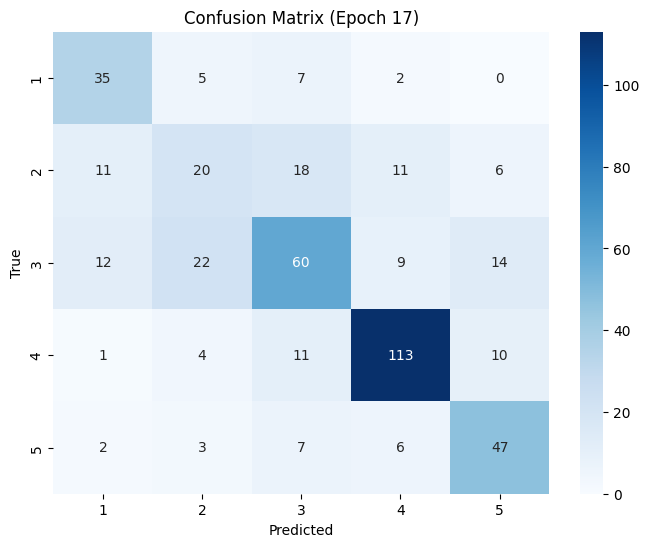

Epoch 18/25, Train Loss: 0.5377, Train Acc: 86.84%, Val Loss: 0.9898, Val Acc: 62.61%


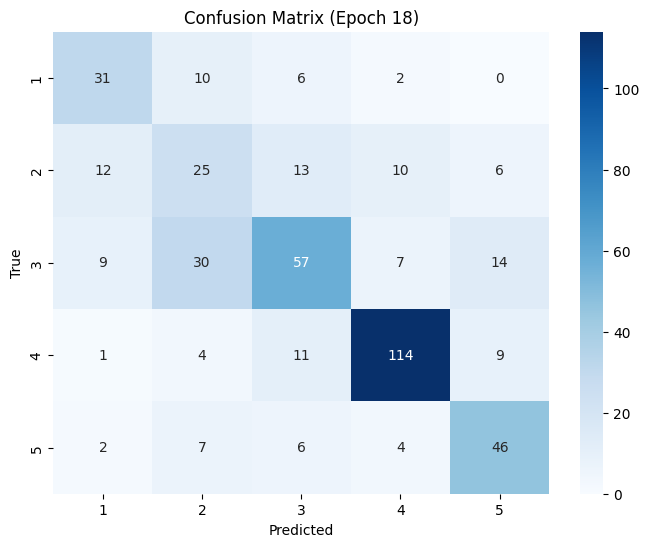

Epoch 19/25, Train Loss: 0.5063, Train Acc: 88.10%, Val Loss: 0.9870, Val Acc: 62.84%


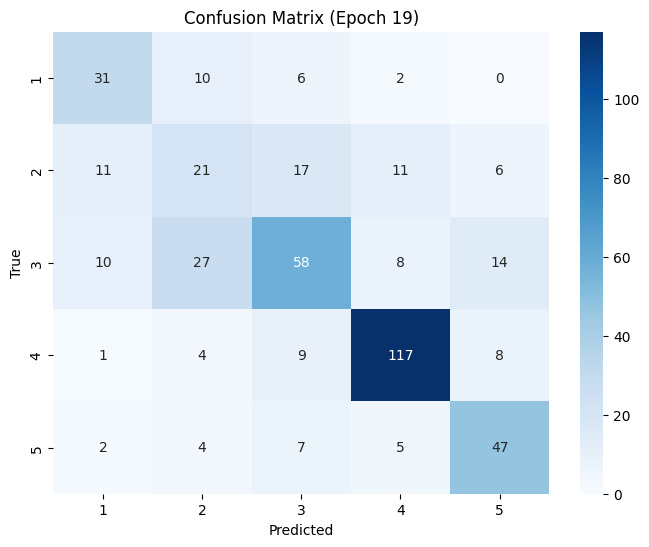

Epoch 20/25, Train Loss: 0.4696, Train Acc: 89.14%, Val Loss: 0.9912, Val Acc: 63.53%


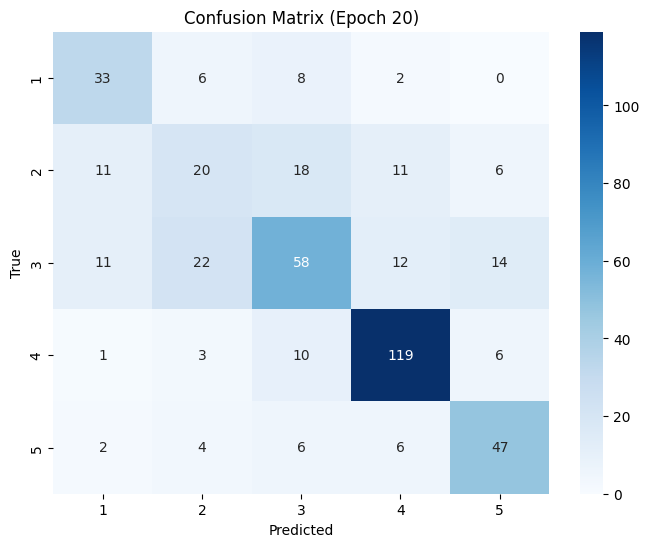

Epoch 21/25, Train Loss: 0.4408, Train Acc: 90.46%, Val Loss: 0.9865, Val Acc: 63.99%


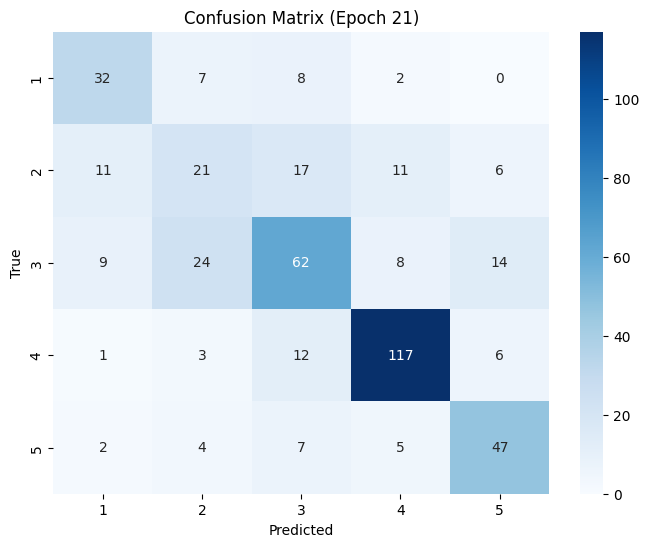

Epoch 22/25, Train Loss: 0.4074, Train Acc: 91.84%, Val Loss: 0.9861, Val Acc: 63.76%


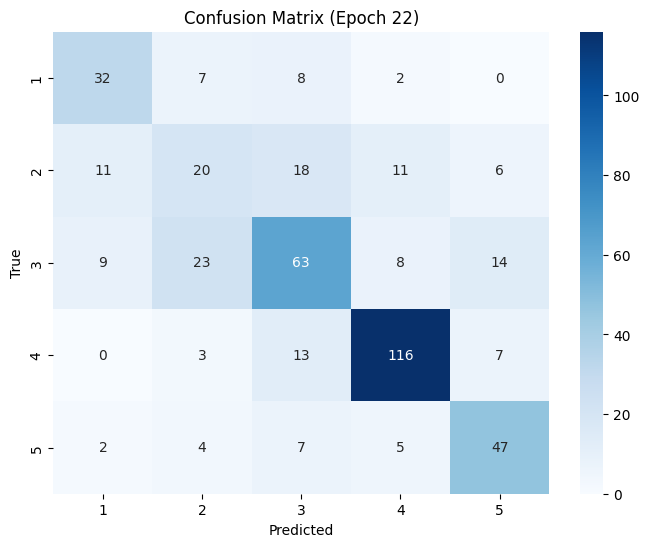

Epoch 23/25, Train Loss: 0.3770, Train Acc: 92.36%, Val Loss: 0.9909, Val Acc: 63.99%


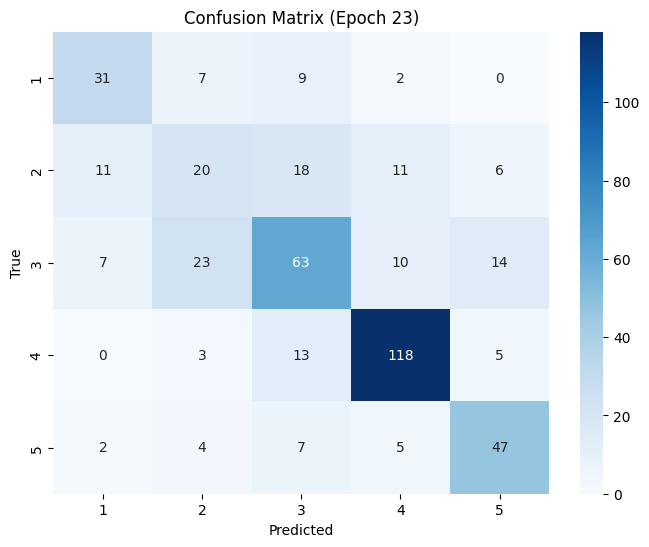

Epoch 24/25, Train Loss: 0.3516, Train Acc: 93.56%, Val Loss: 0.9891, Val Acc: 63.99%
Early stopping triggered after 24 epochs.


In [37]:
# Initialize variables for early stopping
best_val_loss = float('inf')
patience = 2  # Number of epochs to wait for improvement
patience_counter = 0

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Training phase
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    # Print metrics for this epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset counter
        # Optionally, save the best model here
        # torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs.')
        break

    # Confusion matrix for validation set
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Epoch {epoch + 1})')
    plt.show()

In [43]:
# Plot accuracy and loss graphs
plt.figure()
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.savefig(os.path.join(run_folder, 'accuracy_25epch.png'))
plt.close()

plt.figure()
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.savefig(os.path.join(run_folder, 'loss_25epoch.png'))
plt.close()

plt.show()
print(f'Accuracy and loss graphs saved to {run_folder}')

Accuracy and loss graphs saved to results/run1


In [ ]:
plt.savefig(os.path.join(run_folder, 'loss_deit25epoch.png'))

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
# Final classification report after all epochs
print("Final Classification Report:")
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print(report)

Final Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.63      0.61        49
           2       0.34      0.30      0.32        66
           3       0.58      0.54      0.56       117
           4       0.81      0.85      0.83       139
           5       0.65      0.72      0.69        65

    accuracy                           0.64       436
   macro avg       0.60      0.61      0.60       436
weighted avg       0.63      0.64      0.63       436



In [44]:
# Save the classification report to a text file
report_path = os.path.join(run_folder, 'cls_report_swin_aug-mix.txt')
with open(report_path, 'w') as f:
    f.write(report)

print(f"Classification report saved to {report_path}.")

Classification report saved to results/run1/cls_report_swin_aug-mix.txt.


In [45]:
cm = confusion_matrix(all_labels, all_preds)

print("Confusion Matrix:\n", cm)

# Check if the confusion matrix is not blank (contains any non-zero values)
if cm.sum() > 0:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                 xticklabels=dataset.classes, 
                 yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Epoch {epoch + 1})')
    # Save the confusion matrix plot
    plt.savefig(os.path.join('cls_report_swin-aug-mix.png'), bbox_inches='tight')
    plt.close()  # Close the figure to free memory
else:
    print("Confusion matrix is blank. Not saving.")

Confusion Matrix:
 [[ 31   8   8   2   0]
 [ 11  20  18  11   6]
 [  8  23  63   9  14]
 [  0   3  13 118   5]
 [  2   4   7   5  47]]


In [46]:
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
import torch
import torchvision.models as models

In [47]:
model.to(device).eval()

DeiTForImageClassificationWithTeacher(
  (deit): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTSdpaAttention(
            (attention): DeiTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
           

In [48]:

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Directory containing test images
test_dir = './../../dataset/test'
test_images = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]

In [49]:
# Sort filenames to ensure correct order
test_images.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Assuming filenames are numeric

# Initialize lists to store filenames and predictions
filenames = []
predictions = []

# Process each image in the test directory
for image_name in test_images:
    image_path = os.path.join(test_dir, image_name)
    image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode
    image = test_transform(image)
    image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Predict the class
    with torch.no_grad():
        outputs = model(image)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)
        class_id = predicted.item()

    # Save results
    filenames.append(os.path.splitext(image_name)[0])  # Remove .jpg from filename
    predictions.append(class_id + 1)  # Map class_id to 1-based index if needed

In [50]:
# Save results to a CSV file
results_df = pd.DataFrame({'ID': filenames, 'Predictions': predictions})
results_df.to_csv('deit_raw.csv', index=False)